In [ ]:
# 한글폰트설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# eli5설치
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# shap 설치
!pip install shap

# category encoder
!pip install category_encoders

In [ ]:
from google.colab import files
files.upload()

# 데이터 전처리

In [2]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv', encoding='cp949')
cars.head(10)

,Unnamed: 0,이름,가격,신차대비,연식,주행거리,연료,배기량,색상,보증정보,...,보험이력등록,소유자변경,전손,침수전손,침수분손,도난,내차피해(횟수),내차피해(가격),타차가해(횟수),타차피해(가격)
0,0,현대 그랜저IG 3.0 프리미엄,"2,295만원",65,2019.01,"54,648 km",가솔린,"2,999 cc (266마력)",진회색,"60개월 / 100,000km",...,등록,1.0,0.0,0.0,0.0,0.0,1.0,"489,940",0.0,0
1,1,현대 그랜저IG 3.0 익스클루시브???,"2,460만원",68,2017.12?(18년형),"38,221 km",가솔린,"2,999 cc (266마력)",진회색,"60개월 / 100,000km",...,등록,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,현대 그랜저IG 3.0 익스클루시브 스페셜???,"2,630만원",67,2017.07?(18년형),"54,243 km",가솔린,"2,999 cc (266마력)",검정색,불가,...,미등록,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,현대 그랜저IG 2.2 디젤 프리미엄,"1,499만원",42,2018.04,"57,751 km",디젤,"2,199 cc (202마력)",검정색,"60개월 / 100,000km",...,등록,1.0,0.0,0.0,0.0,0.0,9.0,"23,690,549",11.0,"12,859,975"
4,4,현대 그랜저IG 3.0 LPi 모던,"1,599만원",55,2019.02,"96,190 km",LPG,"2,999 cc (235마력)",흰색,"60개월 / 100,000km",...,등록,0.0,0.0,0.0,0.0,0.0,1.0,"2,228,690",0.0,0
5,5,현대 그랜저HG 240 모던 컬렉션,"1,480만원",47,2016.12?(17년형),"63,133 km",가솔린,"2,359 cc (190마력)",검정색,만료,...,등록,1.0,0.0,0.0,0.0,0.0,1.0,"348,937",0.0,0
6,6,현대 그랜저IG 3.0 모던 베이직,"1,599만원",59,2016.12?(17년형),"77,453 km",가솔린,"2,999 cc (266마력)",검정색,만료,...,등록,1.0,0.0,0.0,0.0,0.0,1.0,"442,820",0.0,0
7,7,현대 그랜저IG 2.4 모던,"1,350만원",43,2018.03,"78,179 km",가솔린,"2,359 cc (190마력)",회색,"60개월 / 100,000km",...,등록,5.0,0.0,0.0,0.0,0.0,1.0,"2,038,196",4.0,"20,139,506"
8,8,현대 그랜저HG 240 모던,"1,299만원",43,2013.12?(14년형),"95,522 km",가솔린,"2,359 cc (201마력)",흰색,만료,...,등록,1.0,0.0,0.0,0.0,0.0,3.0,"2,172,271",1.0,"1,089,368"
9,9,현대 그랜저IG 2.4 모던,"1,650만원",53,2017.03?(18년형),"74,509 km",가솔린,"2,359 cc (190마력)",검정색,만료,...,등록,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [3]:
cars.drop(columns='Unnamed: 0', inplace=True)

In [4]:
len(cars.columns)

24

In [5]:
# 제조사명과 모델명 분리

def change_fname(string) :
  return string.split(' ')[0]

# 모델명의 경우 '더', '올', '뉴' 등의 한글자명은 그대로 붙임
def change_mname(string) :
  mname = ''
  count = 0
  for x in string.split(' ')[1:]:
      if x == "그랜져" :
        x = "그랜저"
      mname += x + ' '
      if (len(x) != 1) :
        count += 1
      if count >= 2 :
        break
  return mname.strip()

In [6]:
cars["제조사"] = cars.이름.apply(change_fname)
cars["이름"] = cars.이름.apply(change_mname)

In [7]:
cars.이름.unique()

array(['그랜저IG 3.0', '그랜저IG', '그랜저IG 2.2', '그랜저HG 240', '그랜저IG 2.4',
       '그랜저HG 300', '그랜저IG 하이브리드', '더 뉴 그랜저 하이브리드', '그랜저 뉴 럭셔리',
       '그랜저HG 330', '더 뉴 그랜저 3.3', '더 뉴 그랜저 2.5', '더 뉴 그랜저', '그랜저TG Q270',
       '더 뉴 그랜저 3.0', '그랜저HG 220', '그랜저HG 하이브리드', '더 럭셔리 그랜저', '그랜저HG',
       '그랜저 2.4', '그랜저TG', '그랜저', 'YF쏘나타', '쏘나타 2.0', '쏘나타 더 브릴리언트',
       '쏘나타 뉴 라이즈', 'YF쏘나타 2.0', 'NF쏘나타 트랜스폼', 'LF쏘나타 2.0', 'LF쏘나타 하이브리드',
       'LF쏘나타 1.7', 'LF쏘나타', '쏘나타', '쏘나타 하이브리드', '쏘나타3 1.8', '쏘나타 1.6',
       'EF쏘나타 2.0', 'NF쏘나타 2.0', '쏘나타2', '더 뉴 아반떼 1.6', '아반떼AD',
       '더 뉴 아반떼AD', '아반떼MD', '올 뉴 아반떼 1.6', '아반떼AD 1.6', '아반떼MD 1.6',
       '올 뉴 아반떼', '더 뉴 아반떼', '더 뉴 아반떼AD 1.6', '아반떼 쿠페', '아반떼 N 2.0',
       '아반떼XD 1.5', '뉴 에쿠스 5.0', '뉴 에쿠스 3.8', '뉴 에쿠스', '뉴 에쿠스 4.6',
       '더 뉴 그랜드스타렉스 2.5', '그랜드스타렉스 2.5', '그랜드스타렉스', '뉴스타렉스 2.5',
       '더 뉴 그랜드스타렉스', '뉴스타렉스 캠핑카', '그랜드스타렉스 캠핑카', '스타렉스 캠핑카',
       '그랜드스타렉스 어린이보호차', '그랜드스타렉스 2.4', '뉴스타렉스', '제네시스 쿠페', '제네시스 DH',
       '제네시스 BH330', '제네시스', '더 뉴 

In [8]:
len(cars.이름.unique()), len(cars.제조사.unique())

(167, 6)

In [9]:
cars.dtypes

이름           object
가격           object
신차대비         object
연식           object
주행거리         object
연료           object
배기량          object
색상           object
보증정보         object
엔진형식         object
연비           object
구동방식         object
중량           object
최대토크         object
보험이력등록       object
소유자변경       float64
전손          float64
침수전손        float64
침수분손        float64
도난          float64
내차피해(횟수)    float64
내차피해(가격)     object
타차가해(횟수)    float64
타차피해(가격)     object
제조사          object
dtype: object

In [10]:
# 가격컬럼 정제 
def change_price(string):
  if string in ('[계약]','[보류]','0원') :
    string = np.nan
  else :
    string = int(string.replace('만', '0000').replace(',','')[:-1])
  return string

cars['가격'] = cars.가격.apply(change_price)

In [11]:
len(cars.가격[cars.가격.isna()])

27

In [12]:
# 신차대비컬럼 정제

def change_newratio(string):
  if string.isnumeric() == False :
    string = np.nan
  else : 
    string = int(string)
    return string 

cars["신차대비"] = cars.신차대비.apply(change_newratio)

In [13]:
cars["신차대비"]

0       65.0
1       68.0
2       67.0
3       42.0
4       55.0
        ... 
1536    64.0
1537    96.0
1538    81.0
1539     NaN
1540    71.0
Name: 신차대비, Length: 1541, dtype: float64

In [14]:
# 연식컬럼 정제 -> 개월수로 변환 

def change_year(string):
  year=int(string[:4])
  month=int(string[5:7])
  n=12*(2022-year)+month
  return n

cars['연식']=cars.연식.apply(change_year)

In [15]:
# 주행거리컬럼 정제

cars["주행거리"] = cars.주행거리.apply(lambda x : int(x.replace("km", '').replace(',','').strip()))

In [16]:
# 연료컬럼 정제 -> 가솔린, 디젤, LPG, 기타(하이브리드, 전기 등)로 분류

cars["연료"] = cars.연료.apply(lambda x : x if x in ('가솔린','디젤','LPG') else '기타')

In [17]:
# 배기량 컬럼 정제 -> 마력과 분리 

cars["마력"]= cars.배기량.apply(lambda x : int(x.split('cc')[1].replace('마력','').replace('(','').replace(')','')) if '마력' in x else np.nan)

In [18]:
cars["배기량"] = cars.배기량.apply(lambda x : int(x.split('cc')[0].replace(',','').strip()))

In [19]:
# 색상컬럼 정제

def change_color(string) :
  if "흰색" in string :
    string = "흰색"
  if "검정" in string :
    string = "검정"
  if "기타" in string :
    string = "기타"
  if "은색" in string :
    string = "은색"
  if "진청" in string :
    string = "진청"
  if "파란" in string or "청색" in string :
    string = "파란색"
  return string 
cars["색상"] = cars.색상.apply(change_color)

In [20]:
cars.색상.unique()

array(['진회색', '검정', '흰색', '회색', '기타', '은색', '진주색', '진청', '갈색', '연금색',
       '청옥색', '파란색', '남색', '은하늘색', '노란색', '주황색', '하늘색', '빨간색', '베이지색',
       '보라색', '녹색', '연두색', '자주색', '분홍색', '금색'], dtype=object)

In [21]:
# 보증정보 -> 보증가능여부, 보증기간, 보증거리로 나눔 

def guar(str1):
    if str1=='만료' or str1=='불가':
        return pd.Series([0,0,0])
    elif str1=='정보없음':
        return pd.Series([np.nan,np.nan,np.nan])
    else:
        index=str1.find('/')
        if index==-1:
            time=0
        else:
            time=int(str1[:index-3].strip())
        km=int(str1[index+1:].replace(",","")[:-2].strip())
        return pd.Series([1,time,km])
guartable=cars['보증정보'].apply(guar)
guartable.columns=['보증여부','보증기간','보증거리']
cars=pd.concat([cars,guartable],axis=1)
cars=cars.drop(['보증정보'],axis=1)

In [22]:
# 연비컬럼 정제 

cars["연비"] = cars.연비.apply(lambda x : float(x.replace("km/ℓ",'') if pd.isna(x) == False else np.nan))

In [23]:
# 중량컬럼 정제 

cars["중량"] = cars.중량.apply(lambda x : int(x.replace("kg",'').replace(',','')) if pd.isna(x) == False else np.nan)

In [24]:
# 최대토크 정제

cars["최대토크"] = cars.최대토크.apply(lambda x : float(x.replace("kg.m",'') if pd.isna(x) == False else np.nan))

In [25]:
# 내차피해, 타차피해 가격 숫자형 변경

cars['내차피해(가격)']=cars['내차피해(가격)'].apply(lambda x: int(x.replace(",","")) if isinstance(x,str) else np.nan)
cars['타차가해(가격)']=cars['타차피해(가격)'].apply(lambda x: int(x.replace(",","")) if isinstance(x,str) else np.nan)

In [26]:
cars.drop(columns='타차피해(가격)', inplace=True)

In [27]:
cars.columns

Index(['이름', '가격', '신차대비', '연식', '주행거리', '연료', '배기량', '색상', '엔진형식', '연비',
       '구동방식', '중량', '최대토크', '보험이력등록', '소유자변경', '전손', '침수전손', '침수분손', '도난',
       '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '제조사', '마력', '보증여부', '보증기간', '보증거리',
       '타차가해(가격)'],
      dtype='object')

In [28]:
cars.drop(columns='신차대비', inplace=True)

In [29]:
cars.drop(columns=['침수분손', '침수전손', '도난'], inplace=True)

# 데이터 분석

## 데이터 확인


In [30]:
cars.head(10)

,이름,가격,연식,주행거리,연료,배기량,색상,엔진형식,연비,구동방식,...,전손,내차피해(횟수),내차피해(가격),타차가해(횟수),제조사,마력,보증여부,보증기간,보증거리,타차가해(가격)
0,그랜저IG 3.0,22950000.0,37,54648,가솔린,2999,진회색,3.0 V6 가솔린직접분사,10.1,전륜 FF,...,0.0,1.0,489940.0,0.0,현대,266.0,1.0,60.0,100000.0,0.0
1,그랜저IG 3.0,24600000.0,72,38221,가솔린,2999,진회색,3.0 V6 가솔린직접분사,10.1,전륜 FF,...,NaN,NaN,NaN,NaN,현대,266.0,1.0,60.0,100000.0,NaN
2,그랜저IG,26300000.0,67,54243,가솔린,2999,검정,3.0 V6 가솔린직접분사,9.9,전륜 FF,...,NaN,NaN,NaN,NaN,현대,266.0,0.0,0.0,0.0,NaN
3,그랜저IG 2.2,14990000.0,52,57751,디젤,2199,검정,2.2 I4 터보 디젤 커먼레일,14.8,전륜 FF,...,0.0,9.0,23690549.0,11.0,현대,202.0,1.0,60.0,100000.0,12859975.0
4,그랜저IG 3.0,15990000.0,38,96190,LPG,2999,흰색,3.0 V6,7.6,전륜 FF,...,0.0,1.0,2228690.0,0.0,현대,235.0,1.0,60.0,100000.0,0.0
5,그랜저HG 240,14800000.0,84,63133,가솔린,2359,검정,2.4 I4 가솔린직접분사,11.3,전륜 FF,...,0.0,1.0,348937.0,0.0,현대,190.0,0.0,0.0,0.0,0.0
6,그랜저IG 3.0,15990000.0,84,77453,가솔린,2999,검정,3.0 V6 가솔린직접분사,10.1,전륜 FF,...,0.0,1.0,442820.0,0.0,현대,266.0,0.0,0.0,0.0,0.0
7,그랜저IG 2.4,13500000.0,51,78179,가솔린,2359,회색,2.4 I4 가솔린직접분사,11.2,전륜 FF,...,0.0,1.0,2038196.0,4.0,현대,190.0,1.0,60.0,100000.0,20139506.0
8,그랜저HG 240,12990000.0,120,95522,가솔린,2359,흰색,2.4 I4 가솔린직접분사,11.3,전륜 FF,...,0.0,3.0,2172271.0,1.0,현대,201.0,0.0,0.0,0.0,1089368.0
9,그랜저IG 2.4,16500000.0,63,74509,가솔린,2359,검정,2.4 I4 가솔린직접분사,11.2,전륜 FF,...,0.0,0.0,0.0,0.0,현대,190.0,0.0,0.0,0.0,0.0


In [31]:
cars.shape

(1541, 24)

In [32]:
cars.dtypes

이름           object
가격          float64
연식            int64
주행거리          int64
연료           object
배기량           int64
색상           object
엔진형식         object
연비          float64
구동방식         object
중량          float64
최대토크        float64
보험이력등록       object
소유자변경       float64
전손          float64
내차피해(횟수)    float64
내차피해(가격)    float64
타차가해(횟수)    float64
제조사          object
마력          float64
보증여부        float64
보증기간        float64
보증거리        float64
타차가해(가격)    float64
dtype: object

In [33]:
cat_cols = ['이름','연료','색상','엔진형식','구동방식','보험이력등록','제조사','보증여부']
num_cols = ['가격', '연식', '주행거리', '배기량', '연비', '중량', '최대토크', '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '타차가해(가격)', '마력', '보증기간', '보증거리']

## 결측치 처리

In [34]:
cars.isna().sum()

이름            0
가격           27
연식            0
주행거리          0
연료            0
배기량           0
색상            0
엔진형식        181
연비          158
구동방식         75
중량          115
최대토크         94
보험이력등록        0
소유자변경       683
전손          683
내차피해(횟수)    683
내차피해(가격)    683
타차가해(횟수)    683
제조사           0
마력           56
보증여부        145
보증기간        145
보증거리        145
타차가해(가격)    683
dtype: int64

In [35]:
cars[['내차피해(횟수)','내차피해(가격)','타차가해(횟수)', '타차가해(가격)', '소유자변경']] = cars[['내차피해(횟수)','내차피해(가격)','타차가해(횟수)', '타차가해(가격)', '소유자변경']].fillna(0)
cars['엔진형식'] = cars['엔진형식'].fillna('2.2 I4 터보 디젤 커먼레일')
cars['구동방식'] = cars['구동방식'].fillna('전륜 FF')
cars = cars.fillna(round(cars.mean()))
cars.isna().sum()

<ipython-input-35-3bed090b9b05>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars = cars.fillna(round(cars.mean()))


이름          0
가격          0
연식          0
주행거리        0
연료          0
배기량         0
색상          0
엔진형식        0
연비          0
구동방식        0
중량          0
최대토크        0
보험이력등록      0
소유자변경       0
전손          0
내차피해(횟수)    0
내차피해(가격)    0
타차가해(횟수)    0
제조사         0
마력          0
보증여부        0
보증기간        0
보증거리        0
타차가해(가격)    0
dtype: int64

## 이상치 확인

In [36]:
cars.describe()

,가격,연식,주행거리,배기량,연비,중량,최대토크,소유자변경,전손,내차피해(횟수),내차피해(가격),타차가해(횟수),마력,보증여부,보증기간,보증거리,타차가해(가격)
count,1.541000e+03,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03
mean,2.219585e+08,83.566515,9.670068e+04,2369.042180,11.561389,1671.079169,35.885107,1.523037,0.027255,1.234263,2.530918e+06,0.718365,203.042180,0.287476,19.800130,33653.267359,1.074759e+06
std,5.657752e+09,51.418378,8.382231e+04,837.071274,2.421376,352.873345,134.416461,2.092105,0.162879,2.044065,5.228400e+06,1.378822,75.019661,0.452732,28.476676,48457.828733,2.814552e+06
min,1.000000e+04,-12.000000,0.000000e+00,0.000000,7.100000,895.000000,9.300000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.200000e+06,43.000000,5.078700e+04,1998.000000,9.700000,1460.000000,20.500000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,155.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.250000e+07,81.000000,8.964900e+04,2199.000000,11.500000,1650.000000,35.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,195.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2.399000e+07,121.000000,1.346990e+05,2999.000000,12.800000,2000.000000,40.300000,3.000000,0.000000,2.000000,2.594774e+06,1.000000,266.000000,1.000000,60.000000,100000.000000,7.290930e+05
max,1.870000e+11,417.000000,2.300000e+06,5038.000000,22.000000,2435.000000,3750.000000,9.000000,1.000000,16.000000,4.400000e+07,11.000000,430.000000,1.000000,144.000000,240000.000000,2.890952e+07


In [37]:
# 그래프에 필요한 library

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (12,6)

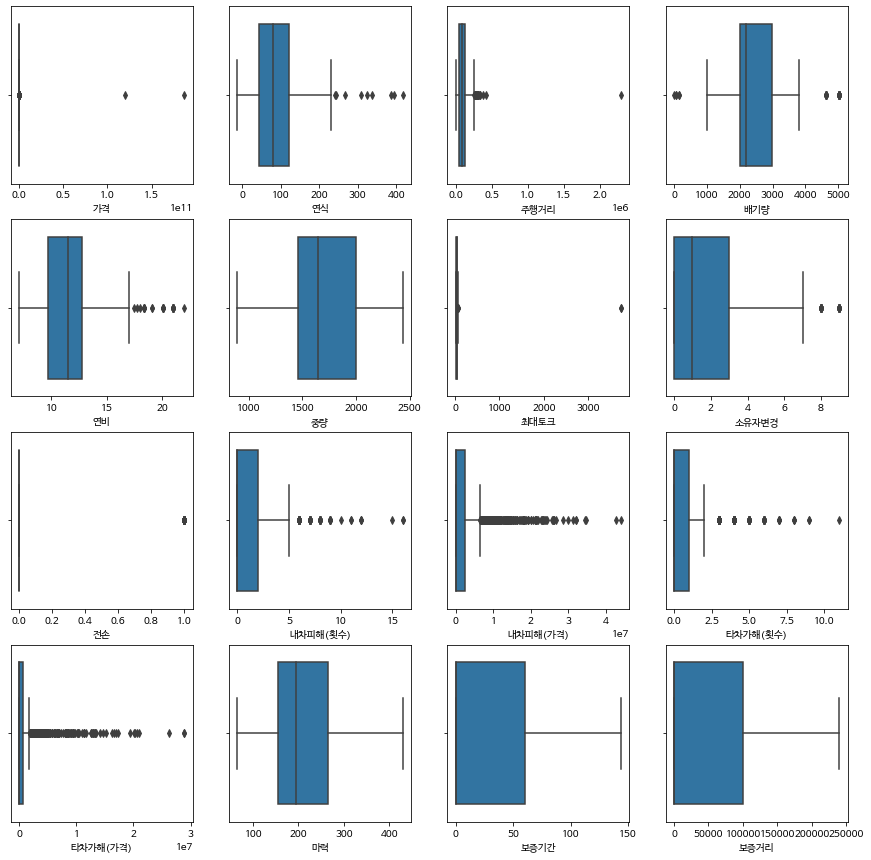

In [38]:
# 이상치 확인 

plt.figure(figsize=(15, 15))

for idx, col in enumerate(num_cols):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(cars[col], orient='v');

In [39]:
# 이상치 체거 

def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5  # 제거 범위 조절 변수
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) & (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff

In [40]:
cars_out = remove_out(cars, ['가격', '연식', '주행거리'])
cars_out

,이름,가격,연식,주행거리,연료,배기량,색상,엔진형식,연비,구동방식,...,전손,내차피해(횟수),내차피해(가격),타차가해(횟수),제조사,마력,보증여부,보증기간,보증거리,타차가해(가격)
0,그랜저IG 3.0,22950000.0,37,54648,가솔린,2999,진회색,3.0 V6 가솔린직접분사,10.1,전륜 FF,...,0.0,1.0,489940.0,0.0,현대,266.0,1.0,60.0,100000.0,0.0
1,그랜저IG 3.0,24600000.0,72,38221,가솔린,2999,진회색,3.0 V6 가솔린직접분사,10.1,전륜 FF,...,0.0,0.0,0.0,0.0,현대,266.0,1.0,60.0,100000.0,0.0
2,그랜저IG,26300000.0,67,54243,가솔린,2999,검정,3.0 V6 가솔린직접분사,9.9,전륜 FF,...,0.0,0.0,0.0,0.0,현대,266.0,0.0,0.0,0.0,0.0
3,그랜저IG 2.2,14990000.0,52,57751,디젤,2199,검정,2.2 I4 터보 디젤 커먼레일,14.8,전륜 FF,...,0.0,9.0,23690549.0,11.0,현대,202.0,1.0,60.0,100000.0,12859975.0
4,그랜저IG 3.0,15990000.0,38,96190,LPG,2999,흰색,3.0 V6,7.6,전륜 FF,...,0.0,1.0,2228690.0,0.0,현대,235.0,1.0,60.0,100000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,렉스턴 스포츠,20900000.0,37,109000,디젤,2157,진회색,e-XDi220 LET,9.7,4WD,...,0.0,0.0,0.0,0.0,쌍용,181.0,0.0,0.0,0.0,0.0
1332,렉스턴 스포츠,29500000.0,31,33000,디젤,2157,검정,e-XDi220 LET,10.1,4WD,...,0.0,0.0,0.0,0.0,쌍용,187.0,1.0,60.0,100000.0,0.0
1333,렉스턴 스포츠,28800000.0,39,38000,디젤,2157,검정,e-XDi220 LET,9.7,4WD,...,0.0,0.0,0.0,0.0,쌍용,181.0,0.0,0.0,0.0,0.0
1334,더 뉴 렉스턴 스포츠,32000000.0,24,11000,디젤,2157,진회색,e-XDi220 LET,10.0,전륜 FF,...,0.0,0.0,0.0,0.0,쌍용,187.0,1.0,60.0,100000.0,0.0


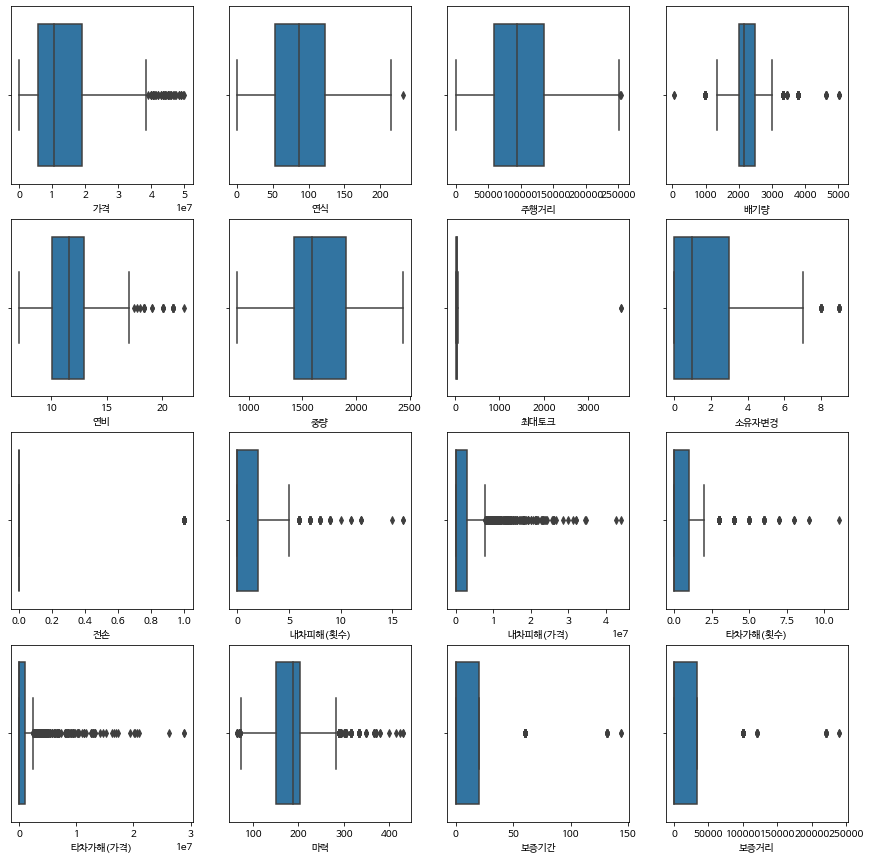

In [41]:
plt.figure(figsize=(15, 15))

for idx, col in enumerate(num_cols):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(cars_out[col]);

## 시각화

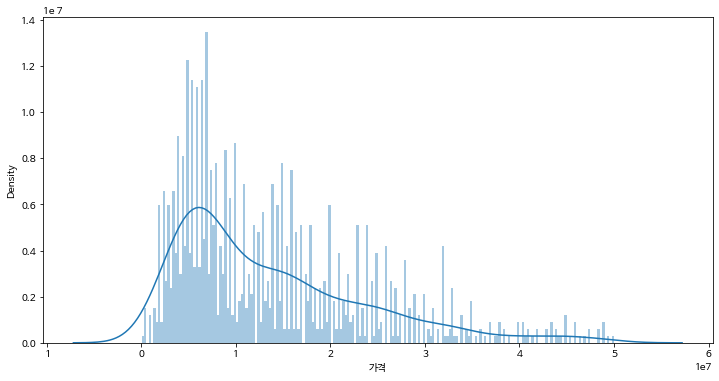

In [42]:
sns.distplot(cars_out.가격,bins=200);

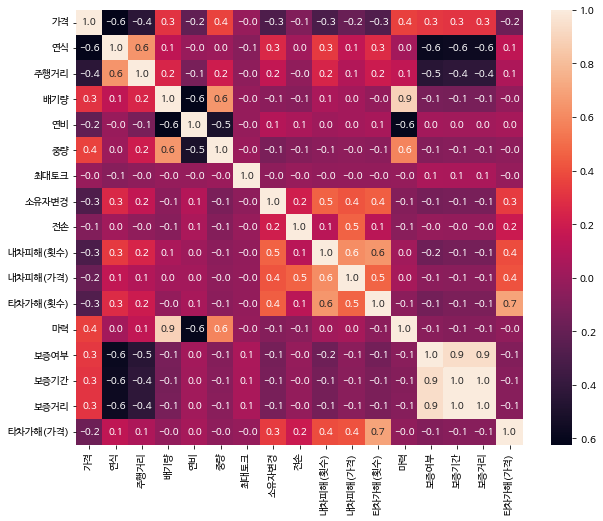

In [43]:
# 상관관계 분석

plt.figure(figsize=(10, 8))
sns.heatmap(cars_out.corr(), annot=True, fmt='3.1f');

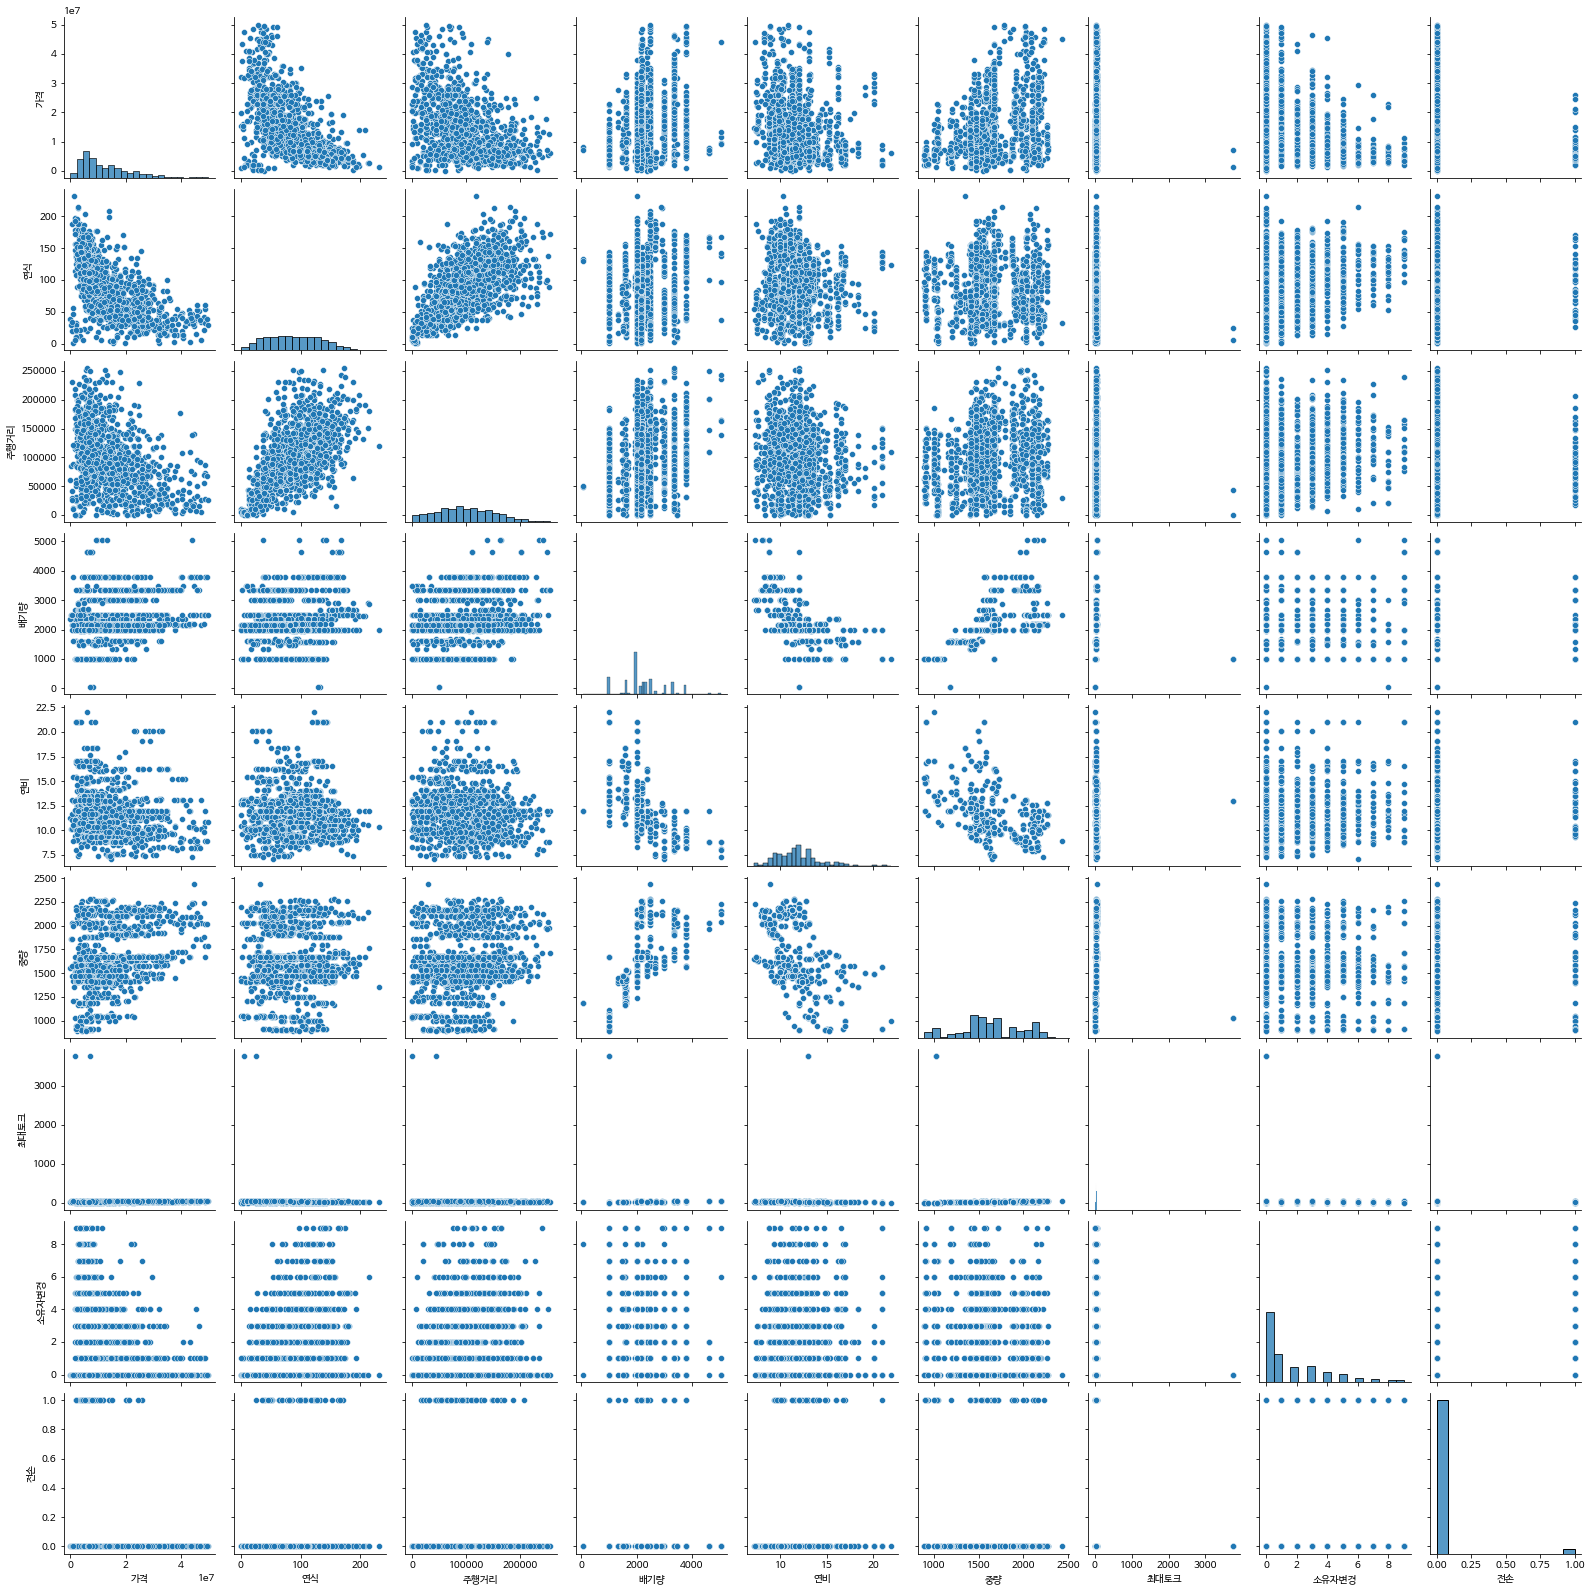

In [44]:
sns.pairplot(data=cars_out[['가격','연식','주행거리','배기량','연비','중량','최대토크', '소유자변경', '전손']]);

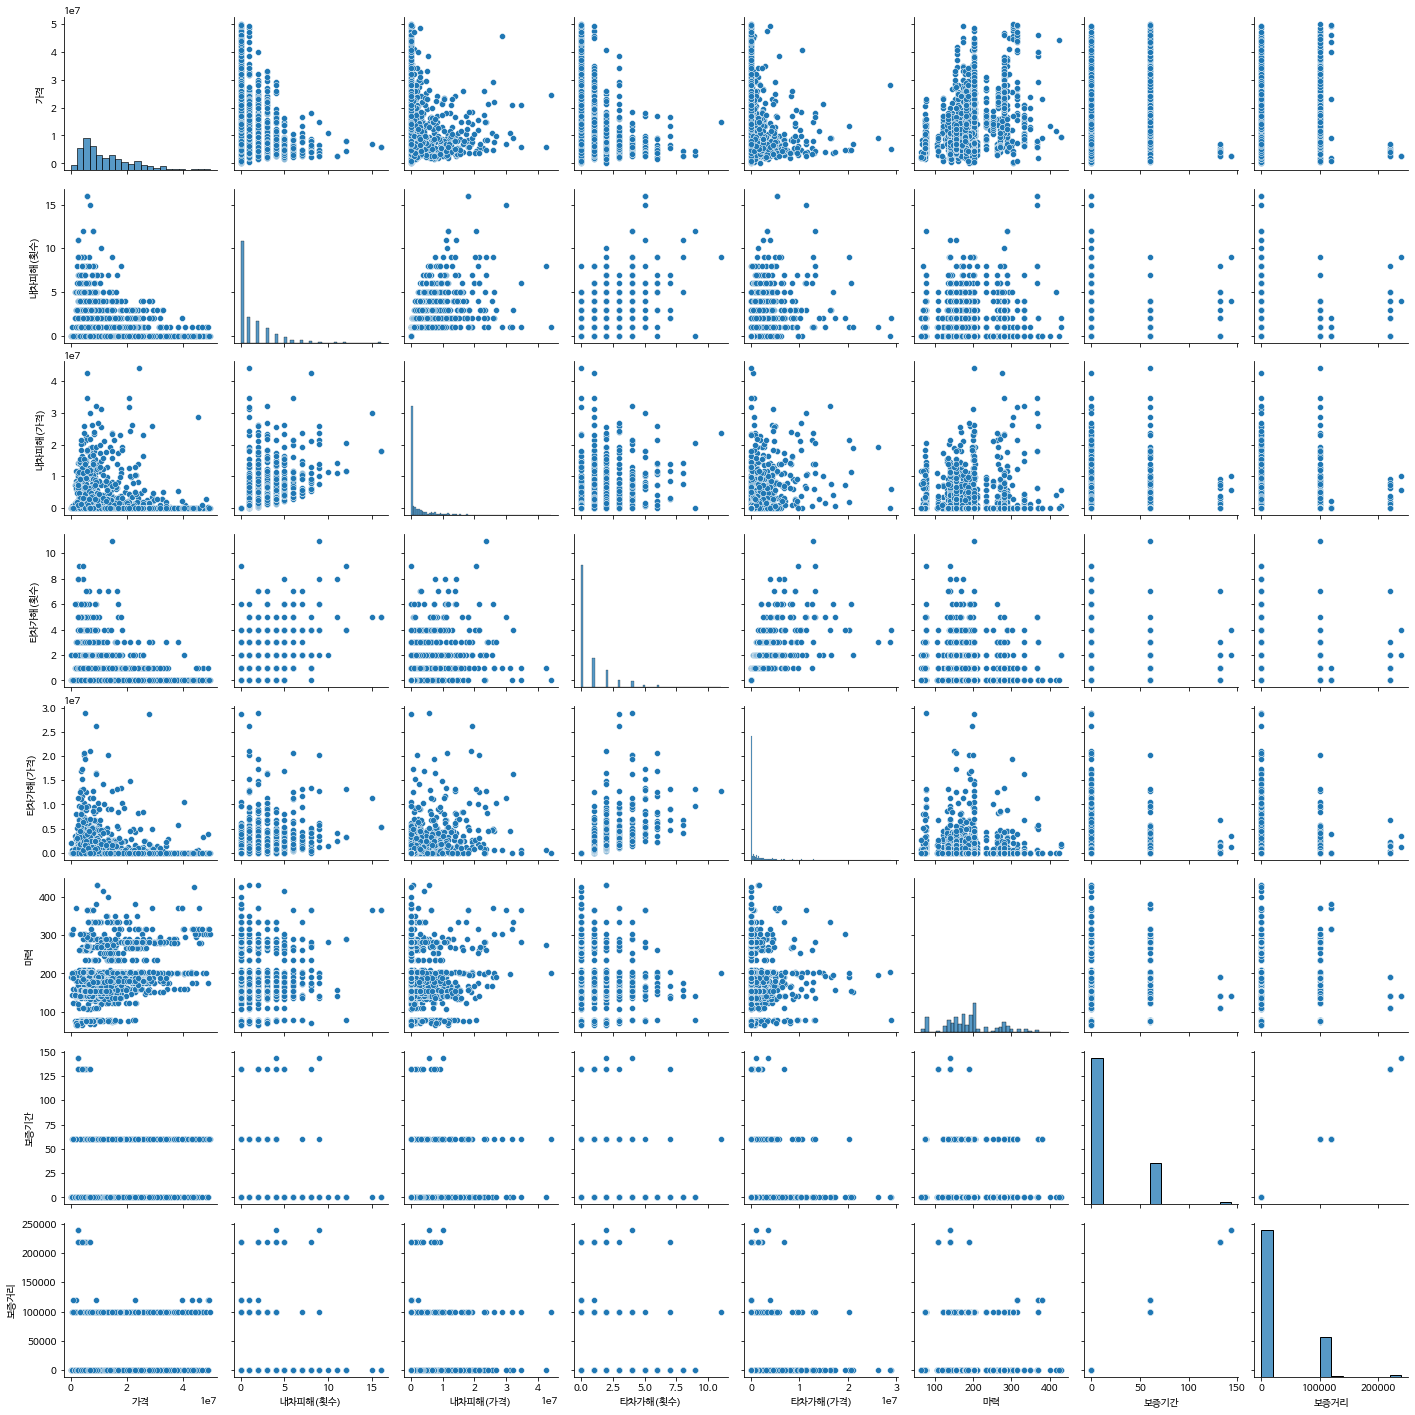

In [ ]:
sns.pairplot(data=cars_out[['가격','내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '타차가해(가격)', '마력', '보증기간', '보증거리']]);

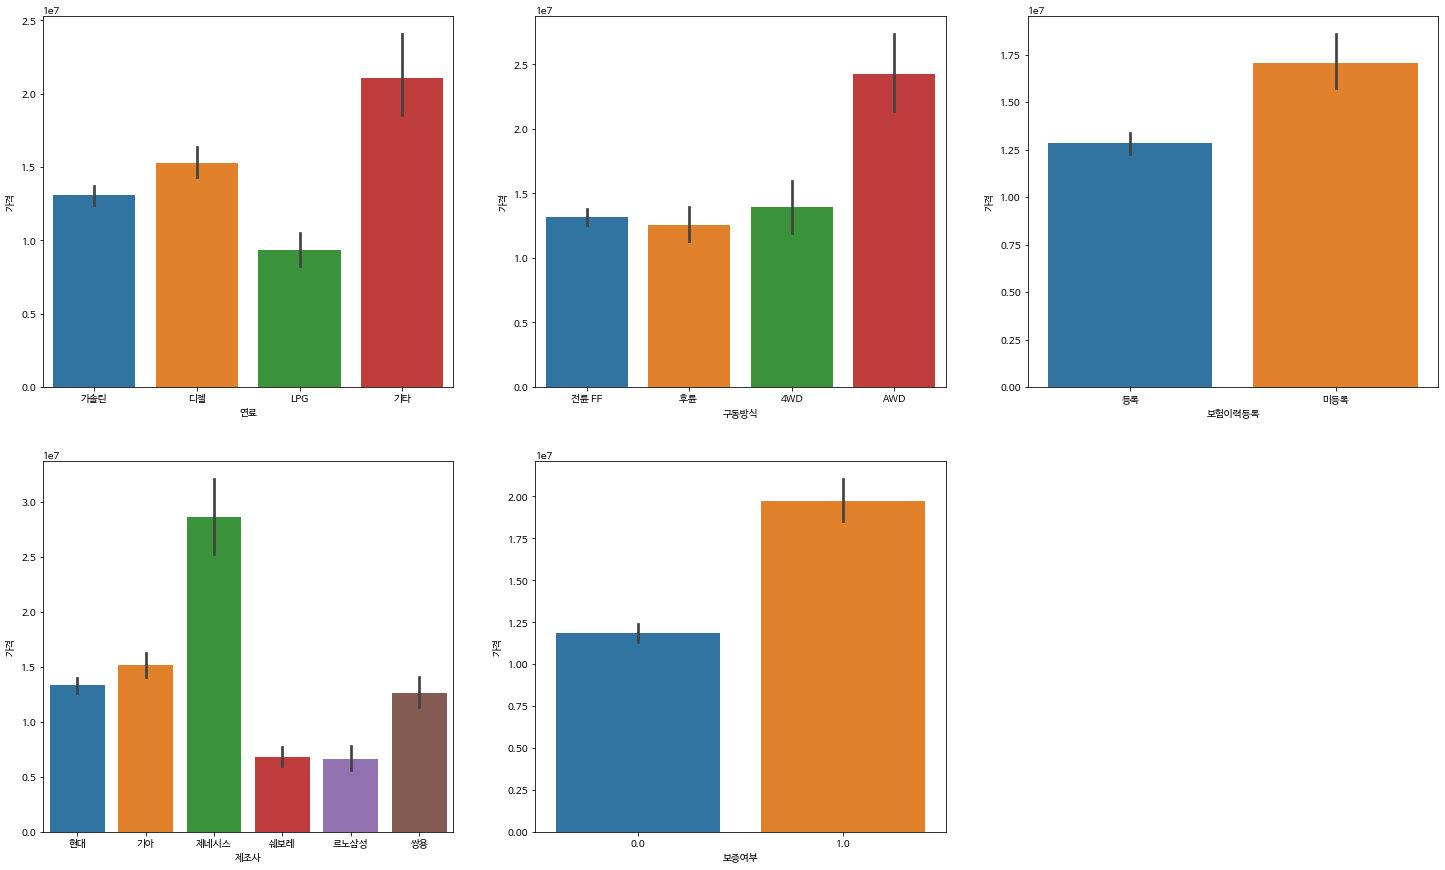

In [45]:
# 범주형 변수 

plt.figure(figsize=(25, 15))

for idx, col in enumerate(['연료','구동방식','보험이력등록','제조사','보증여부']):
    plt.subplot(2,3, idx+1)
    sns.barplot(x= col, y='가격', data=cars_out);

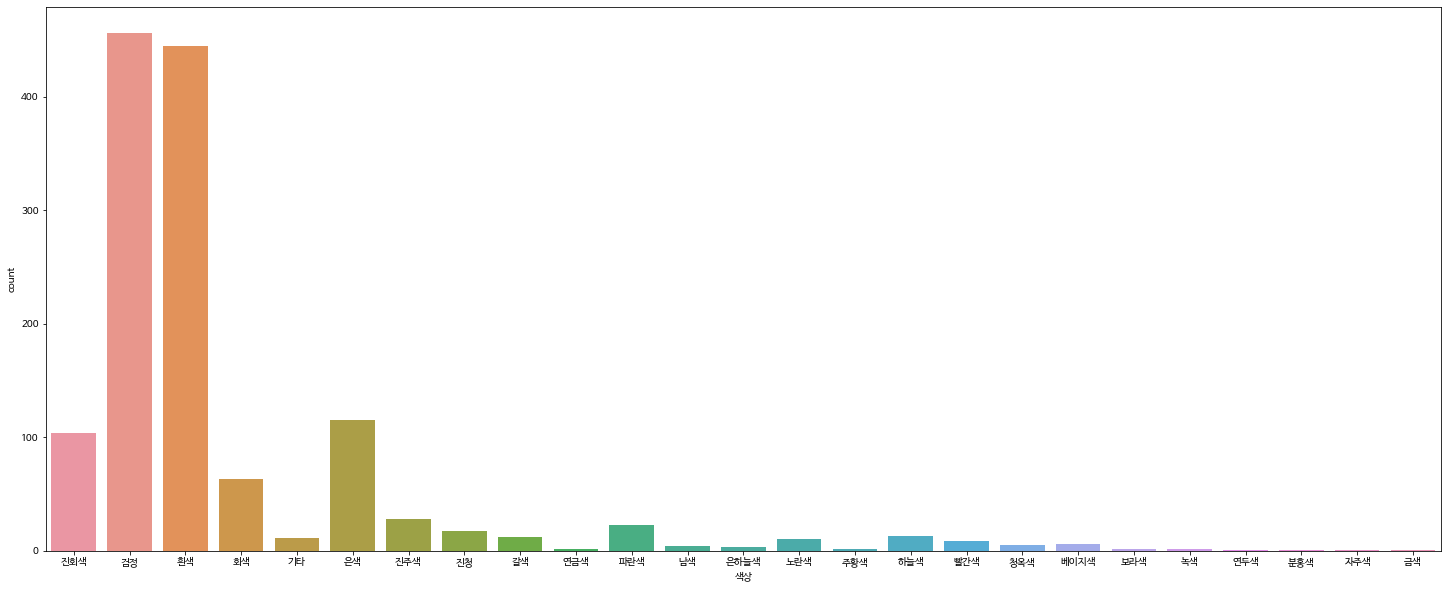

In [46]:
plt.figure(figsize=(25, 10))
sns.countplot(x='색상', data=cars_out);

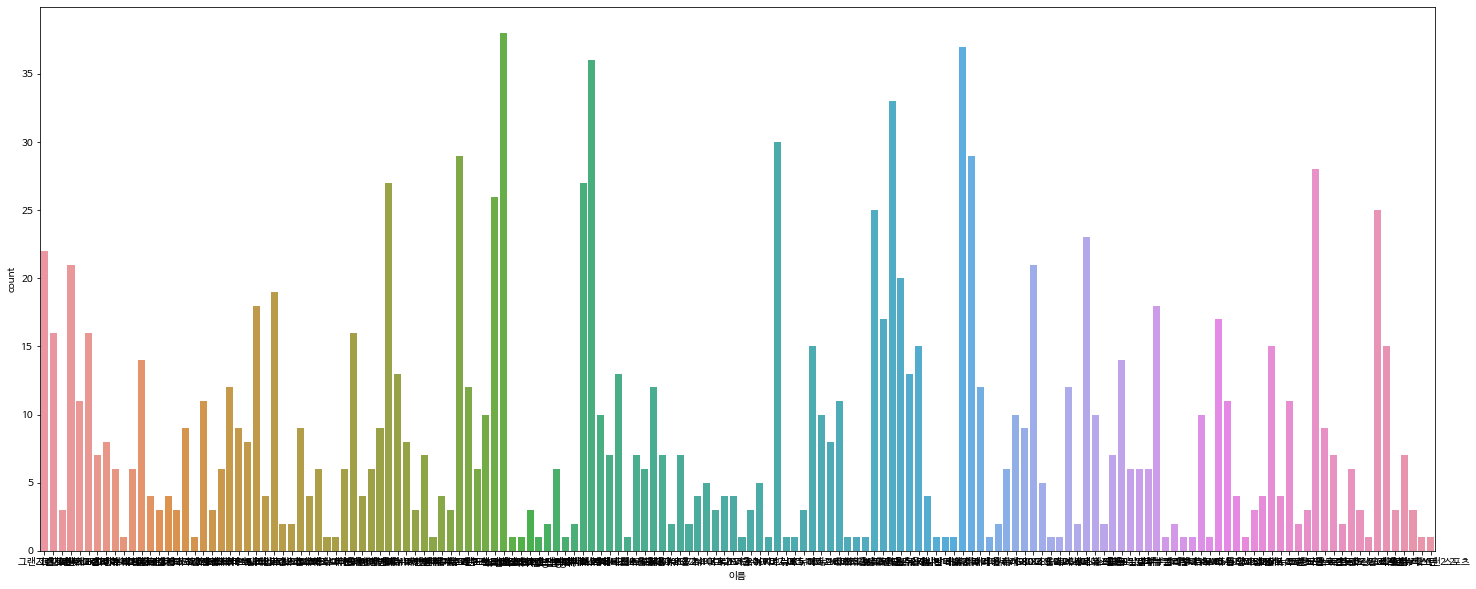

In [47]:
plt.figure(figsize=(25, 10))
sns.countplot(x='이름', data=cars_out);

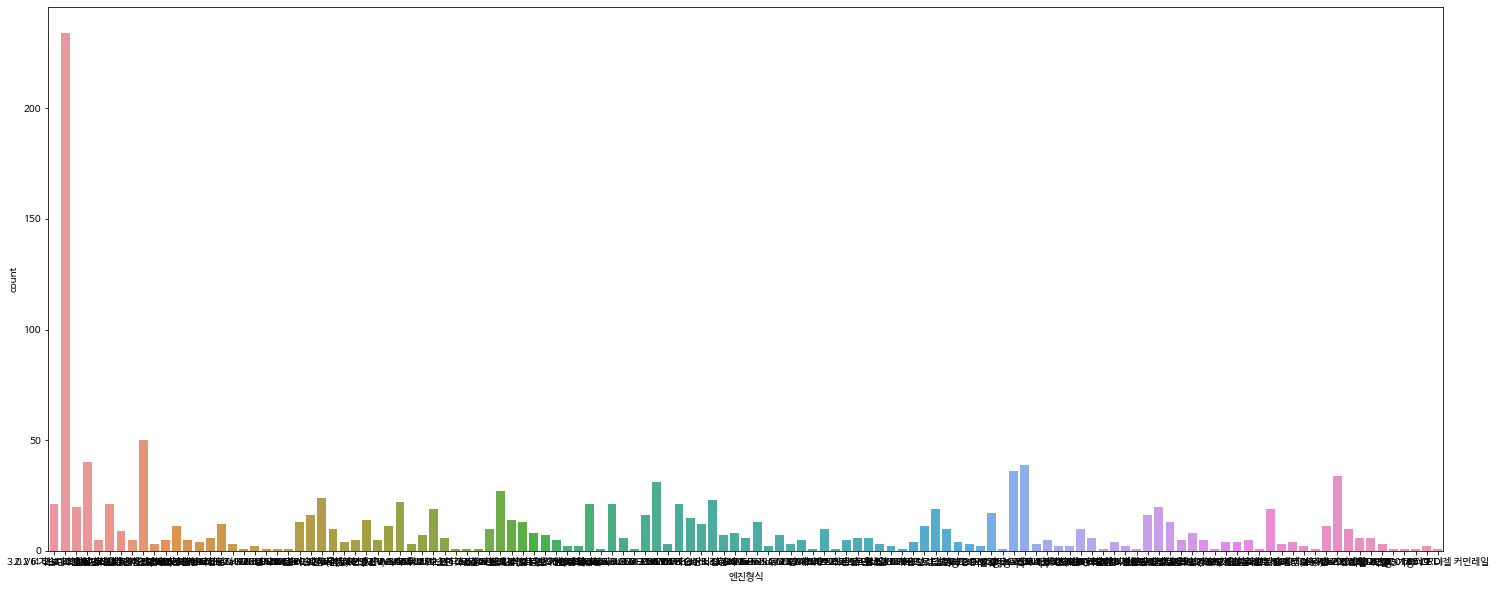

In [48]:
plt.figure(figsize=(25, 10))
sns.countplot(x='엔진형식', data=cars_out);

# Modeling

In [49]:
cars_out.columns

Index(['이름', '가격', '연식', '주행거리', '연료', '배기량', '색상', '엔진형식', '연비', '구동방식', '중량',
       '최대토크', '보험이력등록', '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)',
       '제조사', '마력', '보증여부', '보증기간', '보증거리', '타차가해(가격)'],
      dtype='object')

In [50]:
df_cars = cars_out

In [ ]:
df_cars.to_csv('cars_total.csv')

In [51]:
target = '가격'
X=df_cars.drop(columns = [target, '이름', '엔진형식'])
y=df_cars[target]

X.shape, y.shape

((1336, 21), (1336,))

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, X_test.shape

((854, 21), (214, 21), (268, 21))

In [53]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [54]:
predict = y_train.mean()
print(predict)

# 기준모델로 훈련 에러(MAE) 계산

from sklearn.metrics import mean_absolute_error

y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'train error: {mae:.2f}')

# 검증 에러

y_pred = [predict] * len(y_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'val error: {mae:.2f}')

# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'test error: {mae:.2f}')

13438419.203747073
train error: 7903487.24
val error: 7981895.97
test error: 8390594.83


## linear

In [55]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

In [56]:
linear = make_pipeline(
    OneHotEncoder(), 
    LinearRegression()
)

In [57]:
linear.fit(X_train, y_train)
print('TRAIN 정확도: ', linear.score(X_train, y_train))
print('VAL 정확도: ', linear.score(X_val, y_val))
print('TEST 정확도: ', linear.score(X_test, y_test))
print('TRAIN MAE: ', mean_absolute_error(linear.predict(X_train), y_train))
print('TRAIN MAE: ', mean_absolute_error(linear.predict(X_val), y_val))
print('TEST MAE: ', mean_absolute_error(linear.predict(X_test), y_test))
print('TRAIN R2: ', r2_score(linear.predict(X_train), y_train))
print('TRAIN R2: ', r2_score(linear.predict(X_val), y_val))
print('TEST R2: ', r2_score(linear.predict(X_test), y_test))

TRAIN 정확도:  0.6407569270812761
VAL 정확도:  0.6329456152278347
TEST 정확도:  0.7209116678291487
TRAIN MAE:  3927119.339183947
TRAIN MAE:  4032206.5923242206
TEST MAE:  3924783.69007647
TRAIN R2:  0.4393457832208464
TRAIN R2:  0.44131507528251646
TEST R2:  0.5165571853461778


In [58]:
from lightgbm import LGBMRegressor

light = make_pipeline(
    OrdinalEncoder(), 
    LGBMRegressor()
)

light.fit(X_train, y_train)

print('TRAIN 정확도: ', light.score(X_train, y_train))
print('VAL 정확도: ', light.score(X_val, y_val))
print('TEST 정확도: ', light.score(X_test, y_test))

print('TRAIN MAE: ', mean_absolute_error(light.predict(X_train), y_train))
print('VAL MAE: ', mean_absolute_error(light.predict(X_val), y_val))
print('TEST MAE: ', mean_absolute_error(light.predict(X_test), y_test))
print('TRAIN R2: ', r2_score(light.predict(X_train), y_train))
print('VAL R2: ', r2_score(light.predict(X_val), y_val))
print('TEST R2: ', r2_score(light.predict(X_test), y_test))

TRAIN 정확도:  0.9497588192658865
VAL 정확도:  0.7203125795022727
TEST 정확도:  0.7936347516125611
TRAIN MAE:  1301696.1102459389
VAL MAE:  3173262.084624991
TEST MAE:  3102346.9818784124
TRAIN R2:  0.9416151257568831
VAL R2:  0.6482169760948646
TEST R2:  0.69016313219161


## SelectKBest

In [59]:
encoder=OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.shape, X_val_encoded.shape, X_test_encoded.shape

((854, 55), (214, 55), (268, 55))

In [60]:
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=10)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train_encoded, y_train)
## 테스트 데이터는 transform
X_val_selected = selector.transform(X_val_encoded)
X_test_selected = selector.transform(X_test_encoded)
X_train_selected.shape, X_val_selected.shape, X_test_selected.shape

((854, 10), (214, 10), (268, 10))

In [61]:
all_names = X_train_encoded.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['연식', '주행거리', '배기량', '중량', '내차피해(횟수)', '제조사_제네시스', '마력', '보증여부', '보증기간',
       '보증거리'],
      dtype='object')
Unselected names:  Index(['연료_디젤', '연료_LPG', '연료_가솔린', '연료_기타', '색상_흰색', '색상_진주색', '색상_검정',
       '색상_은색', '색상_파란색', '색상_회색', '색상_은하늘색', '색상_진회색', '색상_베이지색', '색상_노란색',
       '색상_자주색', '색상_빨간색', '색상_남색', '색상_진청', '색상_녹색', '색상_기타', '색상_하늘색',
       '색상_갈색', '색상_청옥색', '색상_주황색', '색상_연금색', '색상_보라색', '색상_연두색', '연비',
       '구동방식_4WD', '구동방식_전륜 FF', '구동방식_AWD', '구동방식_후륜 ', '최대토크', '보험이력등록_미등록',
       '보험이력등록_등록', '소유자변경', '전손', '내차피해(가격)', '타차가해(횟수)', '제조사_현대', '제조사_쉐보레',
       '제조사_기아', '제조사_쌍용', '제조사_르노삼성', '타차가해(가격)'],
      dtype='object')


## LGBM

In [ ]:
X_train.columns

Index(['연식', '주행거리', '연료', '배기량', '색상', '연비', '구동방식', '중량', '최대토크', '보험이력등록',
       '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '제조사', '마력', '보증여부',
       '보증기간', '보증거리', '타차가해(가격)'],
      dtype='object')

In [62]:
X_train_2 = X_train.drop(columns = ['중량', '전손', '색상', '보증기간', '보증거리', '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '타차가해(가격)'])
X_val_2 = X_val.drop(columns = ['중량', '전손', '색상', '보증기간', '보증거리', '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '타차가해(가격)'])
X_test_2 = X_test.drop(columns = ['중량', '전손', '색상', '보증기간', '보증거리', '소유자변경', '전손', '내차피해(횟수)', '내차피해(가격)', '타차가해(횟수)', '타차가해(가격)'])

X_train_2.shape, X_val_2.shape, X_test_2.shape

((854, 11), (214, 11), (268, 11))

In [63]:
from lightgbm import LGBMRegressor

light = make_pipeline(
    OrdinalEncoder(), 
    LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=3000, random_state=42, n_jobs=-1)
)

light.fit(X_train_2, y_train)

print('TRAIN 정확도: ', light.score(X_train_2, y_train))
print('VAL 정확도: ', light.score(X_val_2, y_val))
print('TEST 정확도: ', light.score(X_test_2, y_test))

print('TRAIN MAE: ', mean_absolute_error(light.predict(X_train_2), y_train))
print('VAL MAE: ', mean_absolute_error(light.predict(X_val_2), y_val))
print('TEST MAE: ', mean_absolute_error(light.predict(X_test_2), y_test))
print('TRAIN R2: ', r2_score(light.predict(X_train_2), y_train))
print('VAL R2: ', r2_score(light.predict(X_val_2), y_val))
print('TEST R2: ', r2_score(light.predict(X_test_2), y_test))

TRAIN 정확도:  0.8531996851698992
VAL 정확도:  0.6960126234983746
TEST 정확도:  0.7838977388679943
TRAIN MAE:  2503894.840407851
VAL MAE:  3382388.576210421
TEST MAE:  3081609.8284984534
TRAIN R2:  0.8049632266129219
VAL R2:  0.6264356789924427
TEST R2:  0.6714048372302373


In [64]:
encoder = OrdinalEncoder()
X_train_e = encoder.fit_transform(X_train_2)
X_val_e = encoder.fit_transform(X_val_2)
X_test_e = encoder.fit_transform(X_test_2)

In [65]:
lightgbm = LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=3000, random_state=42, n_jobs=-1)

lightgbm.fit(X_train_e, y_train)

print('TRAIN 정확도: ', light.score(X_train_e, y_train))
print('VAL 정확도: ', light.score(X_val_e, y_val))
print('TEST 정확도: ', light.score(X_test_e, y_test))

print('TRAIN MAE: ', mean_absolute_error(light.predict(X_train_e), y_train))
print('VAL MAE: ', mean_absolute_error(light.predict(X_val_e), y_val))
print('TEST MAE: ', mean_absolute_error(light.predict(X_test_e), y_test))
print('TRAIN R2: ', r2_score(light.predict(X_train_e), y_train))
print('VAL R2: ', r2_score(light.predict(X_val_e), y_val))
print('TEST R2: ', r2_score(light.predict(X_test_e), y_test))

TRAIN 정확도:  0.5649279475461114
VAL 정확도:  0.3611414095292351
TEST 정확도:  0.6805291690665565
TRAIN MAE:  4902909.415471719
VAL MAE:  5567629.355826768
TEST MAE:  4893349.399742002
TRAIN R2:  0.5687770278808324
VAL R2:  0.42128345506072307
TEST R2:  0.6439237691263171


In [66]:
y_test_lg = lightgbm.predict(X_test_e)

print('LGB MAE: ', mean_absolute_error(y_test_lg, y_test))
print('LGB R2: ', r2_score(y_test_lg, y_test))

LGB MAE:  4277633.596165362
LGB R2:  0.6327826982756335


## to Pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import joblib

joblib.dump(lightgbm, '/content/drive/MyDrive/lightgbm_2.pickle')
pickle.dump(lightgbm, open('/content/drive/MyDrive/lightgbm.pickle', 'wb'))

# XAI

In [68]:
df_pred = pd.DataFrame(y_test)
df_pred = df_pred.reset_index(drop=True)
df_pred['가격'] = df_pred['가격'].apply(lambda x : int(x))
df_pred['예측금액'] = y_test_lg
df_pred['예측금액'] = df_pred['예측금액'].apply(lambda x : int(x))
df_pred['차이'] = df_pred['가격'] - df_pred['예측금액']
df_pred['차이(%)'] = df_pred['차이']/df_pred['가격']*100
df_pred

,가격,예측금액,차이,차이(%)
0,14800000,17496203,-2696203,-18.217588
1,5980000,9036444,-3056444,-51.111104
2,13200000,15916298,-2716298,-20.578015
3,5900000,5972463,-72463,-1.228186
4,6700000,7999075,-1299075,-19.389179
...,...,...,...,...
263,18000000,18403332,-403332,-2.240733
264,38000000,27576380,10423620,27.430579
265,8990000,13579082,-4589082,-51.046518
266,3800000,8451870,-4651870,-122.417632


In [69]:
import plotly.express as px

fig = px.scatter(df_pred, x="예측금액", y="가격")
fig.update_layout(
    autosize=False,
    width=950,
    height=800,)
fig.show()

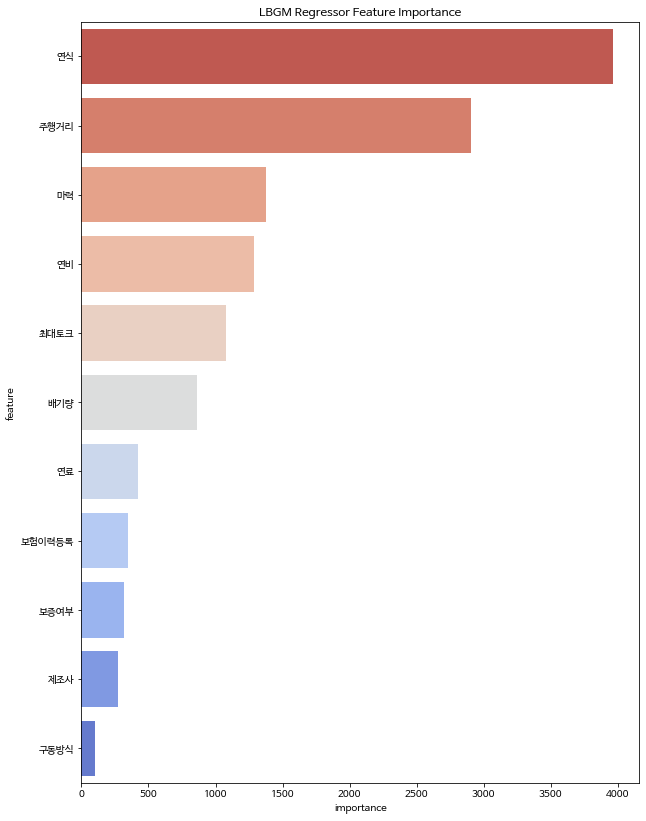

In [70]:
visvis = [[aa,bb] for aa,bb in zip(X_test_2.columns,lightgbm.feature_importances_)]
df_visivs = pd.DataFrame(visvis,columns=['feature','importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(10,14))
plt.title('LBGM Regressor Feature Importance')
sns.barplot(df_visivs.importance,df_visivs.feature,orient='h',palette='coolwarm_r');

In [71]:
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(lightgbm,
                                 n_iter=5,
                                 random_state=1
)

permuter.fit(X_test_e, y_test);

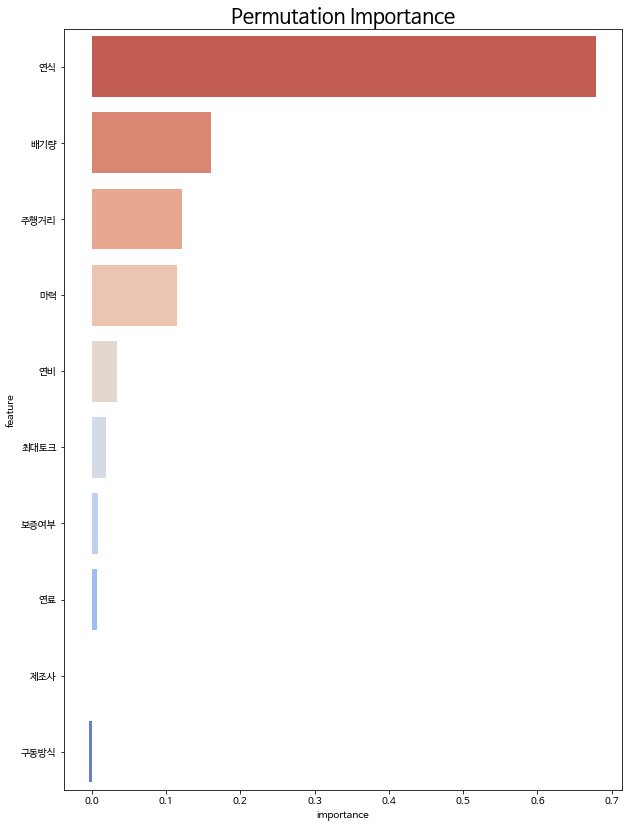

In [72]:
plt.figure(figsize=(10,14))
zipp  = []
for zipper in zip(X_train_2.columns, permuter.feature_importances_):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
sns.barplot(y = zipp.feature[:10], x= zipp.importance[:10], palette='coolwarm_r')
plt.title("Permutation Importance",fontsize=20)
plt.show()

In [73]:
import shap
explainer = shap.TreeExplainer(lightgbm, data=shap.sample(X_test_e, 100), feature_perturbation='interventional')

In [74]:
shap.initjs()
shap.force_plot(
  base_value=explainer.expected_value, 
  shap_values=explainer.shap_values(X_test_e.iloc[10]),
  features=X_test_e.columns
)

In [75]:
shap.initjs()
shap.force_plot(
  base_value=explainer.expected_value, 
  shap_values=explainer.shap_values(X_test_e.iloc[50]),
  features=X_test_e.columns
)